In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

In [3]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,MORTGAGE,8.0,EDUCATION,A,3000,7.29,0,0.02,N,17
26060,23,48000,RENT,1.0,VENTURE,A,4325,5.42,0,0.09,N,4
26061,22,60000,RENT,0.0,MEDICAL,B,15000,11.71,0,0.25,N,4
26062,30,144000,MORTGAGE,12.0,PERSONAL,C,35000,12.68,0,0.24,N,8


In [10]:
table = df_train.groupby(['loan_status']).aggregate({'person_age': 'mean', 'person_emp_length': 'mean'})
print(table)

             person_age  person_emp_length
loan_status                               
0             27.816506           4.954096
1             27.439076           4.159375


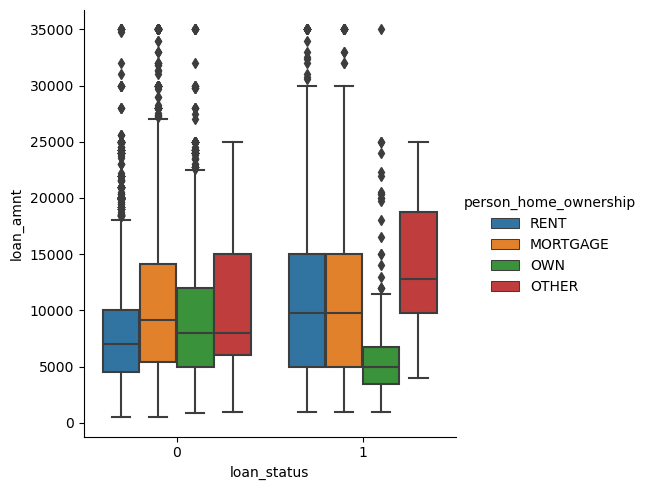

In [51]:
import seaborn as sns

sns.catplot(data=df_train, x="loan_status", y="loan_amnt", hue="person_home_ownership", kind="box")

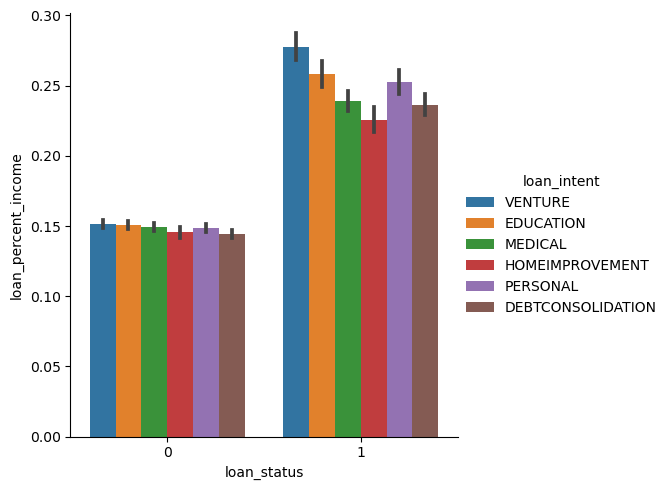

In [53]:
sns.catplot(data=df_train, x="loan_status", y="loan_percent_income", hue="loan_intent", kind="bar")

Choose your features, estimate new ones if needed, and fit a score-based machine learning model to the data. My suggestion is LogisticRegression. Once you have fit a logistic regression model, w the weight vector is stored as the attribute model.coef_.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["loan_status"])

def prepare_data(df_train):
  # df_train = df_train(["person_age", "person_income", "loan_percent_income", "cb_person_cred_hist_length", "person_emp_length", "loan_intent", "person_home_ownership", "loan_amnt", "loan_int_rate"])
  df_train = df_train.dropna()
  y = df_train["loan_status"]
  df_train = df_train.drop(["loan_status", "loan_grade"], axis = 1)
  df_train["cb_person_default_on_file"] = le.fit_transform(df_train["cb_person_default_on_file"])
  df_train["loan_intent"] = le.fit_transform(df_train["loan_intent"])  
  df_train = pd.get_dummies(df_train)
  return df_train, y

X_train, y_train = prepare_data(df_train)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd 

#LogisticRegression
LR = LogisticRegression(random_state=0).fit(X_train,y_train)

weights = LR.coef_

W = pd.DataFrame({"Feature": X_train.columns, "Value": weights[0]})
print(W)

[[-6.36271201e-08 -4.05736714e-05 -2.49228425e-08 -1.99952725e-08
   1.06558086e-04  9.49884254e-08  2.54997092e-09  7.27230294e-09
  -1.22523195e-08 -6.57193588e-09  5.82466416e-11 -3.93951000e-09
   8.07284411e-09]]
                           Feature         Value
0                       person_age -6.362712e-08
1                    person_income -4.057367e-05
2                person_emp_length -2.492284e-08
3                      loan_intent -1.999527e-08
4                        loan_amnt  1.065581e-04
5                    loan_int_rate  9.498843e-08
6              loan_percent_income  2.549971e-09
7        cb_person_default_on_file  7.272303e-09
8       cb_person_cred_hist_length -1.225232e-08
9   person_home_ownership_MORTGAGE -6.571936e-09
10     person_home_ownership_OTHER  5.824664e-11
11       person_home_ownership_OWN -3.939510e-09
12      person_home_ownership_RENT  8.072844e-09
